# Image Processing
Simple examples of image processing concepts on OpenCV. Concepts that we will explored:
Data structures
Color and color conversions
Thresholding and masking
Blurring
Edges

In [28]:
import matplotlib, cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

%matplotlib inline

In [29]:
# read an image
img = cv2.imread('./media/03/battlefront.jpg')
im = mpimg.imread('./media/03/battlefront.jpg')

# show image format (basically a 3-d array of pixel color info, in BGR format)
# print('OpenCV : %s \n\n Matplotlib : %s' % (img, im))

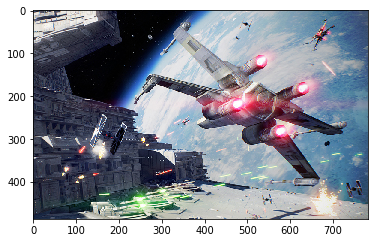

In [30]:
# convert image to RGB color for matplotlib
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# show image with matplotlib
plt.imshow(img)

In [4]:
# convert image to grayscale
gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

# grayscale image represented as a 2-d array
print(gray_img)

[[242 244 244 ...  84  83  82]
 [244 245 245 ...  81  79  78]
 [228 217 206 ...  78  77  77]
 ...
 [ 38  38  39 ... 131 136 144]
 [ 39  38  38 ... 130 132 136]
 [ 36  37  40 ... 137 140 146]]


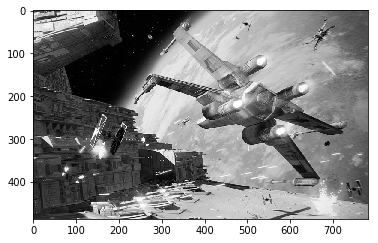

In [5]:
# have to convert grayscale back to RGB for plt.imshow()
plt.imshow(cv2.cvtColor(gray_img, cv2.COLOR_GRAY2RGB))

# Finding the average color of an image

In [6]:
# find average per row
# np.average() takes in an axis argument which finds the average across that axis. 
average_color_per_row = np.average(img, axis=0)

# find average across average per row
average_color = np.average(average_color_per_row, axis=0)

# convert back to uint8
average_color = np.uint8(average_color)
print(average_color)


[112 119 132]


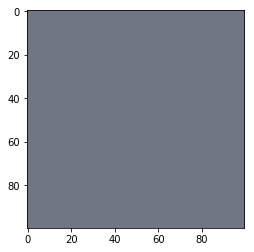

In [7]:
# create 100 x 100 pixel array with average color value
average_color_img = np.array([[average_color]*100]*100, np.uint8)
plt.imshow(average_color_img)

# Binary thresholding on grayscale image

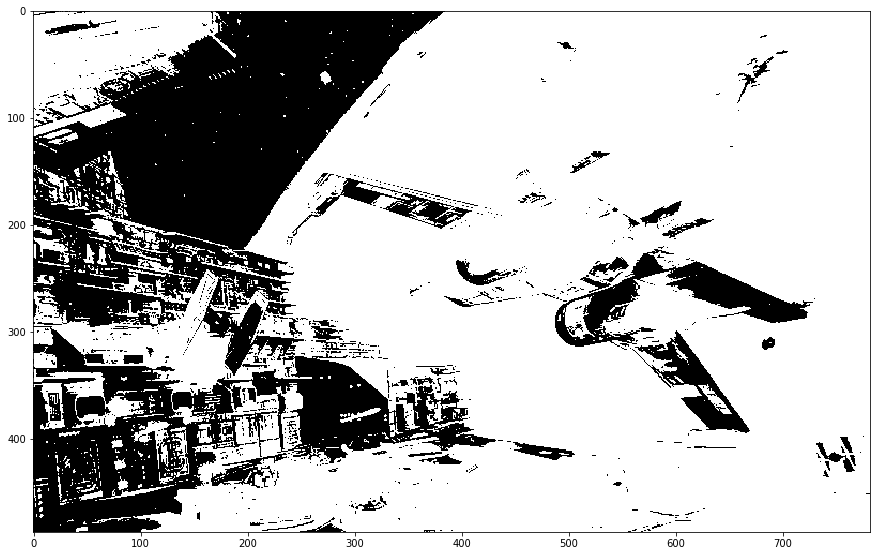

In [8]:
# threshold for grayscale image
_, threshold_img = cv2.threshold(gray_img, 60, 255, cv2.THRESH_BINARY)

threshold_img = cv2.cvtColor(threshold_img, cv2.COLOR_GRAY2RGB)
plt.figure(figsize=(15,15))
plt.imshow(threshold_img)

# Binary thresholding on color

In [9]:
# open new Mondrian Piet painting photo
piet = cv2.imread('./media/03/piet.jpg')
piet_hsv = cv2.cvtColor(piet, cv2.COLOR_BGR2HSV)

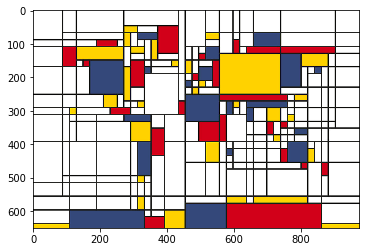

In [10]:
plt.imshow(cv2.cvtColor(piet, cv2.COLOR_BGR2RGB))

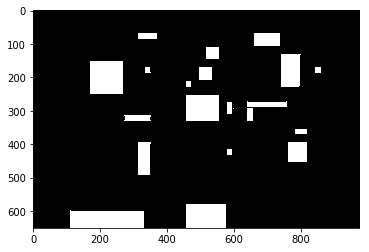

In [11]:
# threshold for hue channel in blue range
blue_min = np.array([85, 60, 60], np.uint8)
blue_max = np.array([150, 255, 255], np.uint8)
threshold_blue_img = cv2.inRange(piet_hsv, blue_min, blue_max)

# show threshold bits
threshold_blue_img = cv2.cvtColor(threshold_blue_img, cv2.COLOR_GRAY2RGB)
plt.imshow(threshold_blue_img)

 # Using binary thresholding to obtain an image mask

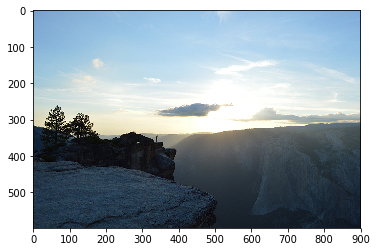

In [12]:
upstate = cv2.imread('./media/03/gc.jpg')
upstate_hsv = cv2.cvtColor(upstate, cv2.COLOR_BGR2HSV)

plt.imshow(cv2.cvtColor(upstate_hsv, cv2.COLOR_HSV2RGB))

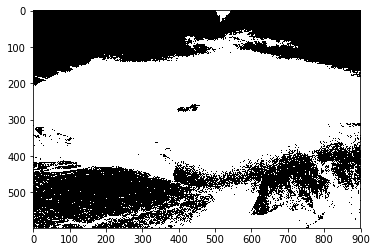

In [13]:
mask_inverse = cv2.inRange(upstate_hsv, blue_min, blue_max)
mask = cv2.bitwise_not(mask_inverse)
plt.imshow(cv2.cvtColor(mask, cv2.COLOR_GRAY2RGB))

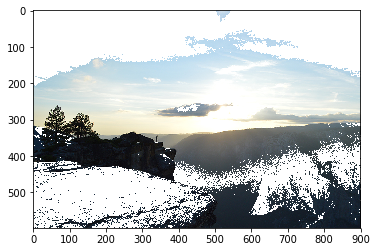

In [14]:
# convert single channel mask back into 3 channels
mask_rgb = cv2.cvtColor(mask, cv2.COLOR_GRAY2RGB)

# perform bitwise and on mask to obtain cut-out image that is not blue
masked_upstate = cv2.bitwise_and(upstate, mask_rgb)

# replace the cut-out parts with white
masked_replace_white = cv2.addWeighted(masked_upstate, 1, \
                                       cv2.cvtColor(mask_inverse, cv2.COLOR_GRAY2RGB), 1, 0)

plt.imshow(cv2.cvtColor(masked_replace_white, cv2.COLOR_BGR2RGB))

# Gaussian Blur

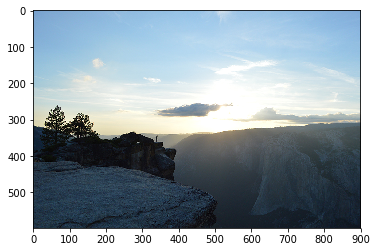

In [15]:
img = cv2.imread('./media/03/gc.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

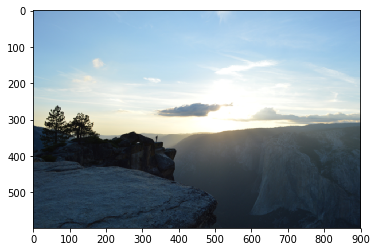

In [16]:
# preproccess with blurring, with 5x5 kernel
img_blur_small = cv2.GaussianBlur(img, (5,5), 0)
cv2.imwrite('./media/03/gc-gaussian-blur-5.jpg', img_blur_small)
plt.imshow(cv2.cvtColor(img_blur_small, cv2.COLOR_BGR2RGB))

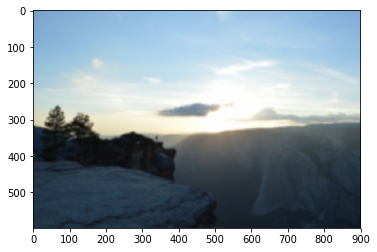

In [17]:
img_blur_large = cv2.GaussianBlur(img, (15,15), 0)
cv2.imwrite('media/03/gc-gaussian-blur-5-3.jpg', img_blur_large)
plt.imshow(cv2.cvtColor(img_blur_large, cv2.COLOR_BGR2RGB))

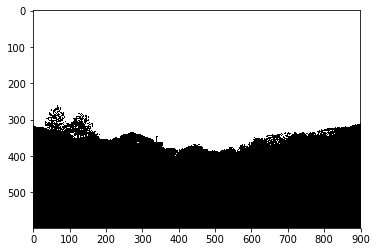

In [19]:
# threshold on regular image
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
_, threshold_img = cv2.threshold(gray_img, 100, 255, cv2.THRESH_BINARY)
cv2.imwrite('media/03/gc-no-blur-thresh.jpg', threshold_img)

plt.imshow(cv2.cvtColor(threshold_img, cv2.COLOR_GRAY2RGB))

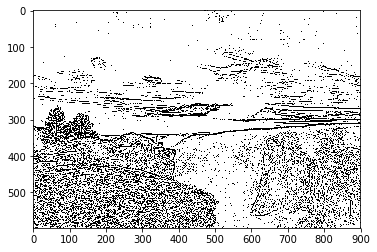

In [21]:
# using adaptive threshold instead of global
adaptive_thresh = cv2.adaptiveThreshold(gray_img,255,\
                                         cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
                                         cv2.THRESH_BINARY,11,2)
plt.imshow(cv2.cvtColor(adaptive_thresh, cv2.COLOR_GRAY2RGB))

# Contour and bounding boxes

True

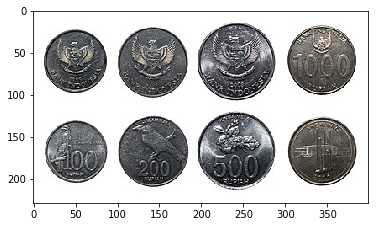

In [22]:
coins = cv2.imread('./media/03/coins3.jpg')
plt.imshow(cv2.cvtColor(coins, cv2.COLOR_BGR2RGB))
cv2.imwrite('./media/03/coins-orig.jpg', coins)

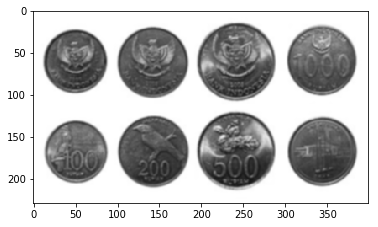

In [23]:
# get binary image and apply Gaussian blur
coins_gray = cv2.cvtColor(coins, cv2.COLOR_BGR2GRAY)
coins_preprocessed = cv2.GaussianBlur(coins_gray, (5, 5), 0)

plt.imshow(cv2.cvtColor(coins_preprocessed, cv2.COLOR_GRAY2RGB))

# Edge detection

Canny edge detector on OpenCV. Usage of edge detection versus thresholding to obtain binary image.

True

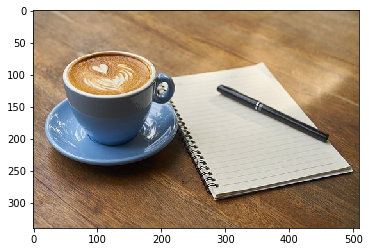

In [24]:
cups = cv2.imread('./media/03/coffee.jpg')
plt.imshow(cv2.cvtColor(cups, cv2.COLOR_BGR2RGB))
cv2.imwrite('./media/03/coffee-orig.jpg', cups)

In [25]:
# preprocess by blurring and grayscale
cups_preprocessed  = cv2.cvtColor(cv2.GaussianBlur(cups, (7,7), 0), cv2.COLOR_BGR2GRAY)

True

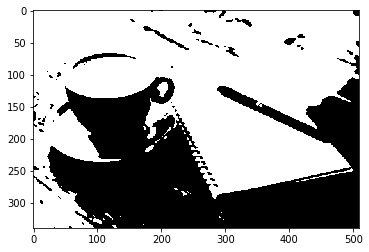

In [27]:
# find binary image with thresholding
low_thresh = 125
high_thresh = 200
_, cups_thresh = cv2.threshold(cups_preprocessed, low_thresh, 255, cv2.THRESH_BINARY)
plt.imshow(cv2.cvtColor(cups_thresh, cv2.COLOR_GRAY2RGB))
cv2.imwrite('./media/03/coffee-thresh-low.png', cups_thresh)

_, cups_thresh_hi = cv2.threshold(cups_preprocessed, high_thresh, 255, cv2.THRESH_BINARY)
cv2.imwrite('./media/03/coffee-thresh-hi.png', cups_thresh_hi)

True

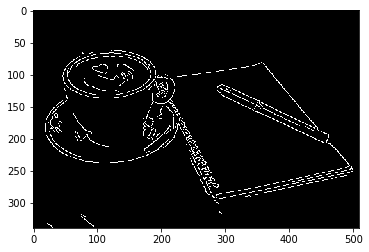

In [26]:
# find binary image with edges
cups_edges = cv2.Canny(cups_preprocessed, threshold1=90, threshold2=110)
plt.imshow(cv2.cvtColor(cups_edges, cv2.COLOR_GRAY2RGB))
cv2.imwrite('./media/03/coffee-edges.png', cups_edges)